In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sn
import string
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

## Lendo os momentos de hu e zernike anteriormente gravados em csv

In [22]:
df = pd.read_csv('caracteristicasHu.csv')

### Adicionando os labels para cada linha de características, como valores discretos entre entre 1 e 26 que representam as letras

In [23]:
df = df.drop(['Unnamed: 0'],axis=1)

In [24]:
discret = []
k=1
for i in range(1,27):
    
    for x in range(0,10):
        
        discret.append(k)
    
    k = k + 1

In [25]:
df['target'] = discret

In [26]:
X = df.iloc[:,1:33].values
y = df.iloc[:,33:34].values

In [27]:
dados = pd.DataFrame(X)

### Aplicando normalização para os valores das características utilizando máximo e mínimo

In [28]:
minMax = preprocessing.MinMaxScaler()
dadosN = minMax.fit_transform(dados)

In [29]:
X = dadosN

## Aplicando divisão para treino e teste e empregando o PCA

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [31]:
pca = PCA(n_components=0.90, whiten=True)
X = pca.fit_transform(X)


## Aplicando classificador sobre o resultado do PCA

In [32]:
mlp = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
#mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, alpha=1e-4,
 #                   solver='sgd', verbose=False, tol=1e-4, random_state=1,
  #                  learning_rate_init=.1)

In [33]:
clf.fit(X_train,y_train)
#mlp.fit(X_train,y_train)

C:\Users\joaqu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\joaqu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joaqu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'adaptive']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

## Realizando predição sobre o conjunto de teste

In [34]:
predicao = clf.predict(X_test)
#predicao = mlp.predict(X_test)

### Aplicando métricas para medir a precisão do modelo e exibir a matriz de confusão

In [35]:
print("Pontuacao conjunto de treino: %f" % clf.score(X_train, y_train))
print("Pontuacao conjunto de teste: %f" % clf.score(X_test, y_test))

Pontuacao conjunto de treino: 0.670330
Pontuacao conjunto de teste: 0.423077


In [36]:
precisao = accuracy_score(y_test,predicao)

In [37]:
precisao

0.4230769230769231

In [38]:
matrizConfusao = confusion_matrix(y_test,predicao)

In [39]:
alfabeto = []
for letra in string.ascii_lowercase:
    alfabeto.append(letra)

In [40]:
matriz = pd.DataFrame(matrizConfusao)
matriz.index = alfabeto

In [41]:
matriz.columns = alfabeto

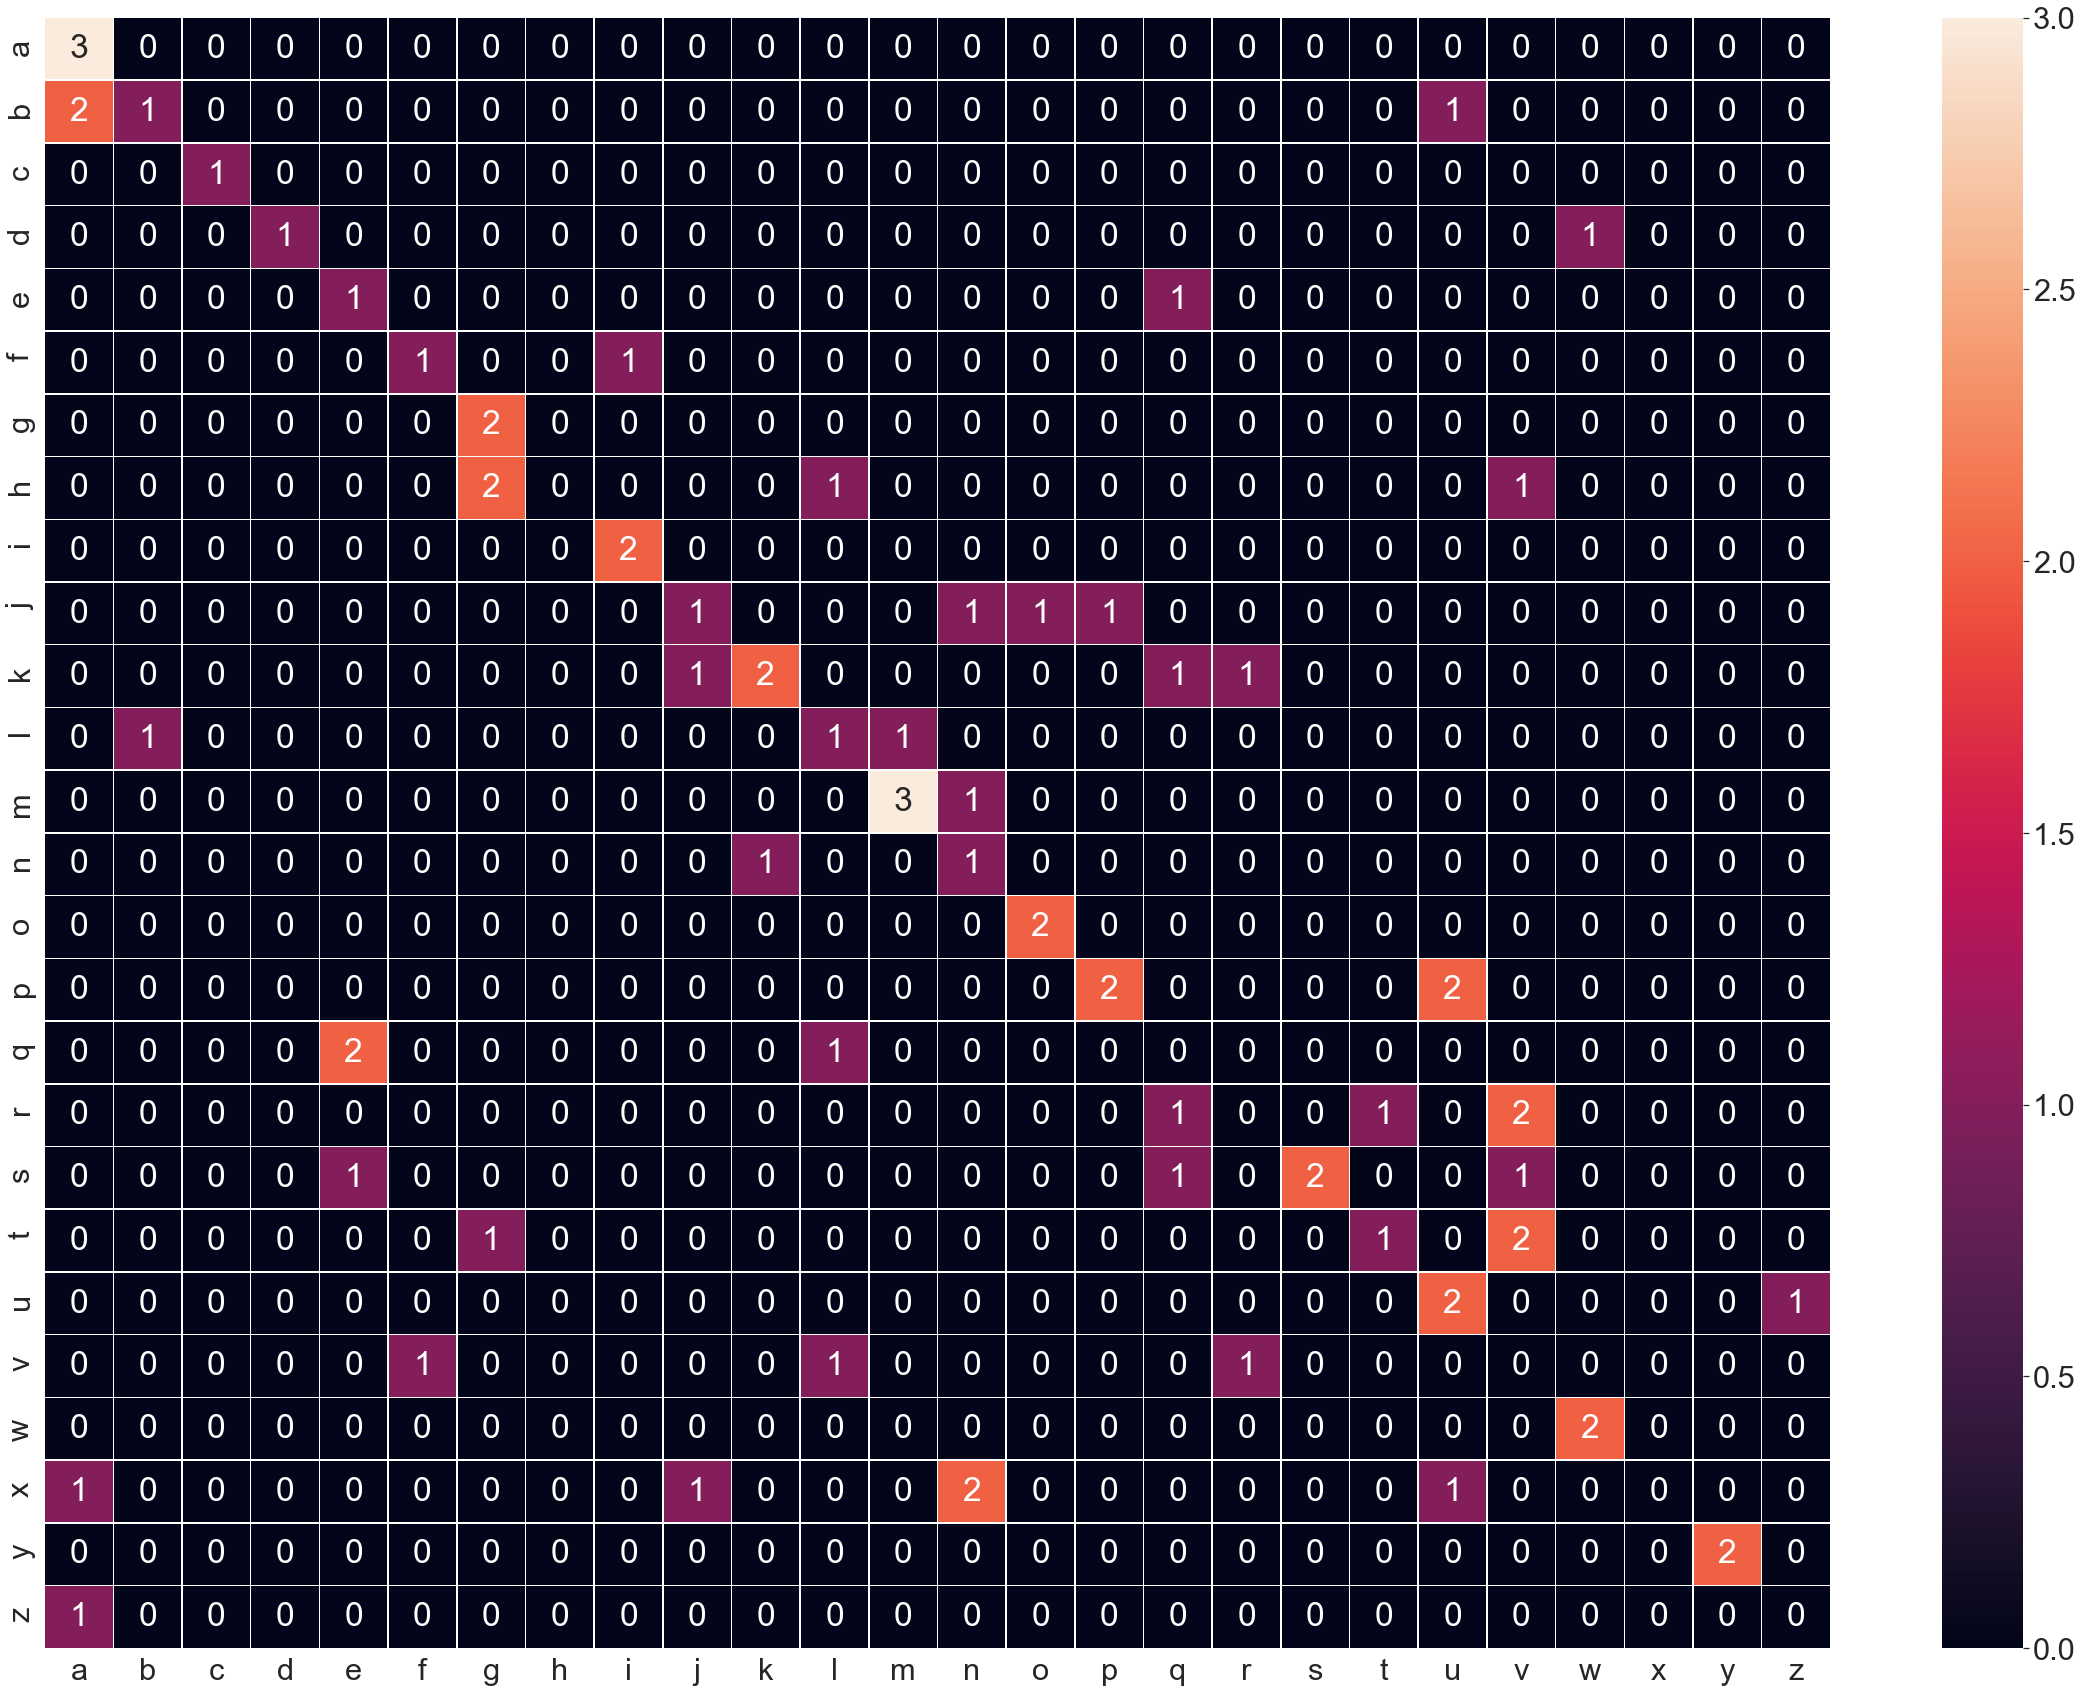

In [42]:
plt.figure(figsize = (40,30))
# plt.figure(figsize = (10,7))
sn.set(font_scale=2.8)
sn.heatmap(matriz, annot=True,linewidths=.5)# font size

# Aplicando Classificação

In [44]:
from math import copysign, log10
import numpy as np
from mahotas.features import zernike_moments
import cv2

In [45]:
def reduzir_imagem(imagem):
    scale_percent = 20 # percent of original size
    width = int(imagem.shape[1] * scale_percent / 100)
    height = int(imagem.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(imagem, dim, interpolation = cv2.INTER_AREA)
    return resized

In [46]:
def extrair_hu_zernike(imagem):
    showMoments = True
    _, imagem = cv2.threshold(imagem, 128, 255, 
                              cv2.THRESH_BINARY)
    
    moment = cv2.moments(imagem)
    
    huMoments = cv2.HuMoments(moment)
    zernikeMoments = zernike_moments(imagem, radius = 21)
    
    vethu_zernike = []

    for i in range(0,7):
        if(showMoments):
            vethu_zernike.append(-1*copysign(1.0,huMoments[i][0])*log10(abs(huMoments[i][0])))
        
    for i in range(0,25):
        vethu_zernike.append(zernikeMoments[i])
    
    return vethu_zernike

In [47]:
captura = cv2.VideoCapture(0)

colunas = []
for i in range(1,33):
    colunas.append(i)
    
dados = pd.DataFrame(columns=colunas)
kernel = np.ones((5,5), np.uint8)

while(1):
    ret, frame = captura.read()
    
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = reduzir_imagem(frame)
    frame = cv2.GaussianBlur(frame,(3,3),0)
    frame_dilatado = cv2.dilate(frame, kernel,iterations = 1)
    #frame_sobel = sobel(frame)
    #frame_sobel = frame_sobel * 5
    #frame_sobel = frame_sobel * 255
    #frame_sobel = frame_sobel.astype('uint8')
    cv2.imwrite('frame.jpg',frame_dilatado)
    #cv2.imshow("Video", frame_sobel)
    if ret:
        imagem = cv2.imread('frame.jpg',cv2.IMREAD_GRAYSCALE)
        imagemX = extrair_hu_zernike(imagem)
        #print(imagemX)
        minMax = preprocessing.MinMaxScaler()
        imagemNormalizada = minMax.fit_transform(np.asanyarray(imagemX).reshape(-1,1))
        #print(imagemNormalizada)
        imagem_pca  = pca.fit_transform(imagemNormalizada)
        
        imag = []
        for item in imagem_pca:
            imag.append(item[0])
        
        dados.loc[0] = imag
        
        predicao = clf.predict(dados.loc[0].values.reshape(1,-1))
        #print(predicao)
        predicao = str(predicao).replace('[', '').replace(']', '')
        imagem_exibir = cv2.imread('alfabeto/'+ predicao + '.jpg')
        cv2.imshow("Letra Detectada", imagem_exibir)
        k = cv2.waitKey(5000)
        cv2.destroyAllWindows()
        
    #k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
 
captura.release()
cv2.destroyAllWindows()